<a href="https://colab.research.google.com/github/rhi-batstone/IntroPsychStats/blob/main/lm_assumptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://drive.google.com/uc?export=view&id=1Kn0ZllPYV8NAxE4lDukMecpRQ088GjwY' width=300>

#<font color='darkorange'>Is our model making good estimates of intercepts (a) and slopes (b)</font>

In this notebook we'll use the happiness data to start to understand when our model is likely to make good estimates of the intercepts and slopes? We'll learn about some of the assumptions we are making when we fit a linear regression, and how when these assumptions are not met we can get poor estimates of intercepts and slopes.  


### 1. Load in the data

Lets load in some packages. These have functions that other people have made, and will hopefully make our lives a lot easier!

In [ ]:
install.packages("jtools")
library(jtools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘pander’




Then let's load in the [world happiness data](https://worldhappiness.report/faq/).

In [ ]:
#here we will read in a csv file and place it into something called df
df_happy <- read.csv("https://raw.githubusercontent.com/rhi-batstone/IntroPsychStats/main/data/worldHappiness.csv", header = T)

#let's take a look at the data
head(df_happy)

,Country,year,LifeLadder,GDP,SocialSupport,lifeExpectancy,Freedom,Generosity,PerceptionsOFcorruption
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
2,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
3,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
4,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
5,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776
6,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823


Now that we can see the data, think about a question you might like to ask about what might lead to some contries having higher/lower happiness than others.

> E.g., what predicts a countries happiness?

Write out your question in words here:
> How is individual freedom associated with happiness in a country?

### 2. Visualize our data

Then let's plot the scatterplot. Here we will choose:
> What we'd like to predict and put it on the y-axis.

> What we'd like to use to help make those predictions and put it on the x-axis.

> The choice of these variables should follow from the question you're asking above!


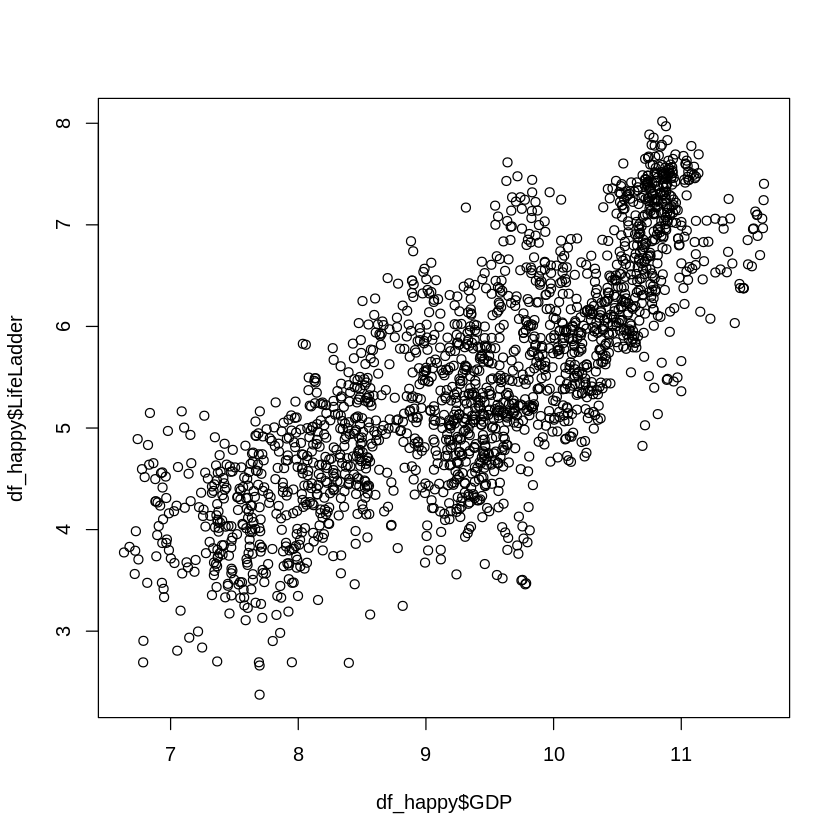

In [ ]:
plot(x = df_happy$GDP, y = df_happy$LifeLadder)

### 3. Define and fit our model

Now we can speficy the model we'd like to fit.
> Remember, here we use the formula: "what we'd like to predict" ~ "what we'd like to use to help make those predictions."
  

In [ ]:
#fit a linear model
model_happy <- lm(LifeLadder ~ GDP, data = df_happy)


This bit of code then use our inputs to find the best fit linear equation for :
> LifeLadder ~ Normal(mu, sd)

> mu = a + b*GDP

Let's use the summ function to tell us what values of a and b it found for the best fit line.
> Note: we'll also calculate our 95% confidence interval here too!

In [ ]:
#What does the best fit model look like?
summ(model_happy, confint = TRUE)

MODEL INFO:
Observations: 1913 (36 missing obs. deleted)
Dependent Variable: LifeLadder
Type: OLS linear regression 

MODEL FIT:
F(1,1911) = 3176.35, p = 0.00
R² = 0.62
Adj. R² = 0.62 

Standard errors: OLS
---------------------------------------------------------
                     Est.    2.5%   97.5%   t val.      p
----------------- ------- ------- ------- -------- ------
(Intercept)         -1.69   -1.94   -1.44   -13.20   0.00
GDP                  0.76    0.74    0.79    56.36   0.00
---------------------------------------------------------

We can see from this output that the model is pretty certain that the slope of the population is somewhere between ? and ?.
> Those are the range of population values that are compatible with our sample!
  
We can also get a sense of how well your model predictions reflect the observed values using R2.

### 4. Visualize the results

Let's take a look at the estimates a little more visually

Registered S3 methods overwritten by 'broom':
  method            from  
  tidy.glht         jtools
  tidy.summary.glht jtools

Loading required namespace: broom.mixed



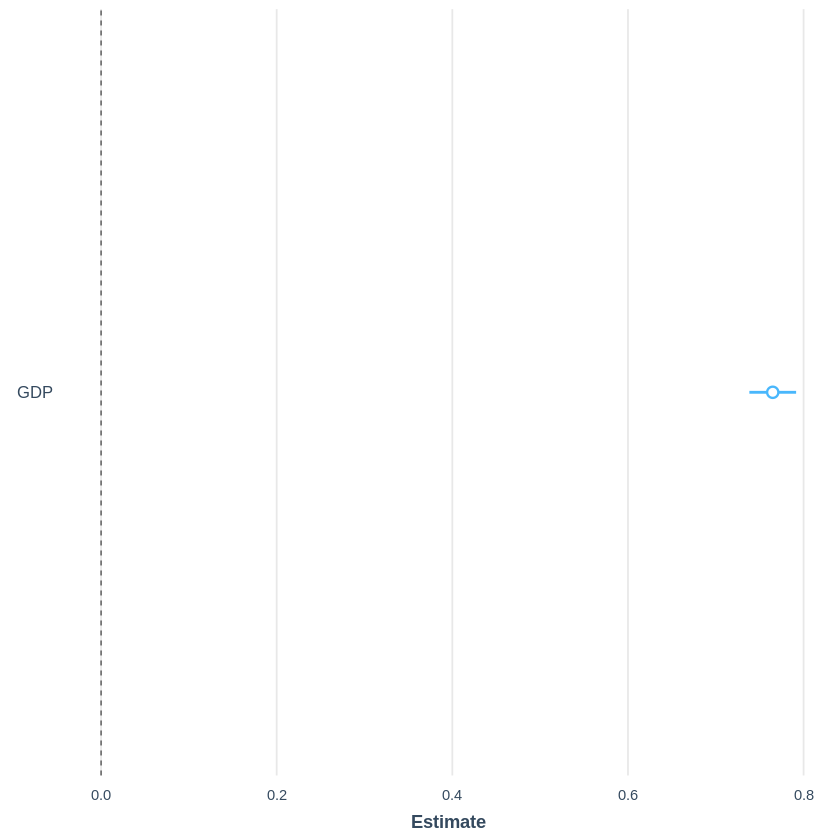

In [ ]:
#plot the estimates of the slopes
plot_summs(model_happy)

Let's take a look at the regression line a little more visually

In [ ]:
#plot line on the data
effect_plot(model_happy, pred = GDP, interval = TRUE, plot.points = TRUE)

### 5. Checking assumptions

**Assumption 1**

Let's check the assumption that the errors (residuals) are normally distributed.

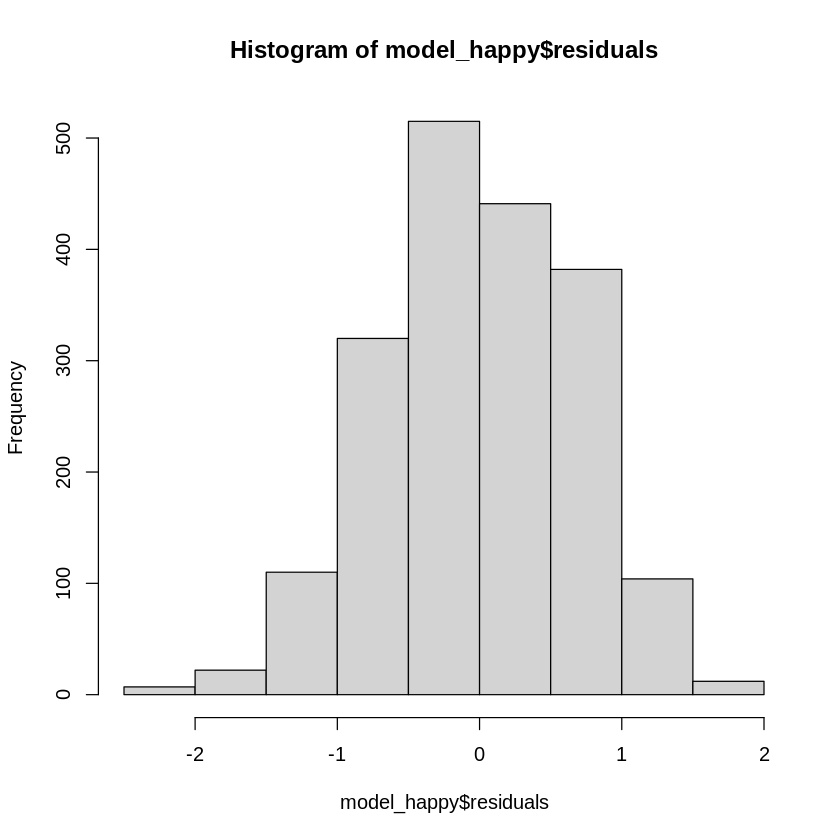

In [ ]:
hist(model_happy$residuals)

The above plot is just like the histograms we've looked at in the past. Now we are looking at how errors are distributed.

> If the errors do not look to have many small errors and few large errors (both positive and negative) then a normal distribution might not be the best model of the data. We might also be missing an important variable...

**Assumption 2** - no patterns in the residuals
  
Let's check the assumption that the variance in the errors is constant.

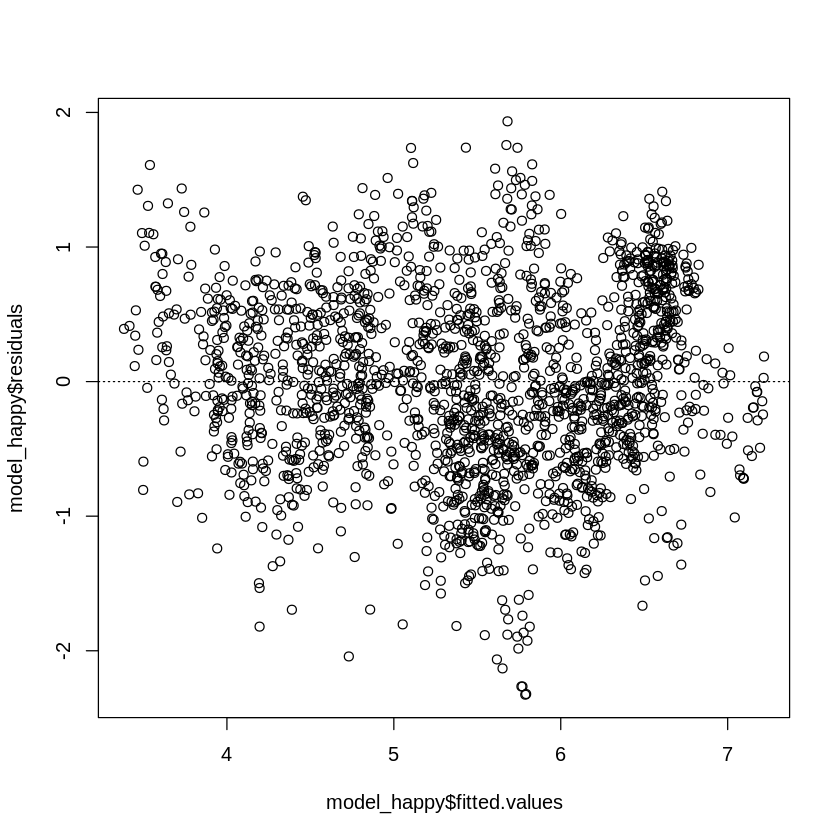

In [ ]:
plot(y=model_happy$residuals, x = model_happy$fitted.values)
abline(h = 0, lty = 3)

The above plot shows you all the errors (residuals) for each value that the model predicts. Ideally, we'd like to see errors evenly distributed around 0 (i.e., the dashed line).

> If there is more variance in the errors for some prediction values then this means the model is better at predicting some values than others.

**Assumption 2** - no patterns in the residuals
   
Let's check the assumption that the relationship between your variables is linear (i.e., that a straight line and not a curvy line fit the data best). We can see this intuatively in the origianl scatter plot, or we can look at the residuals!

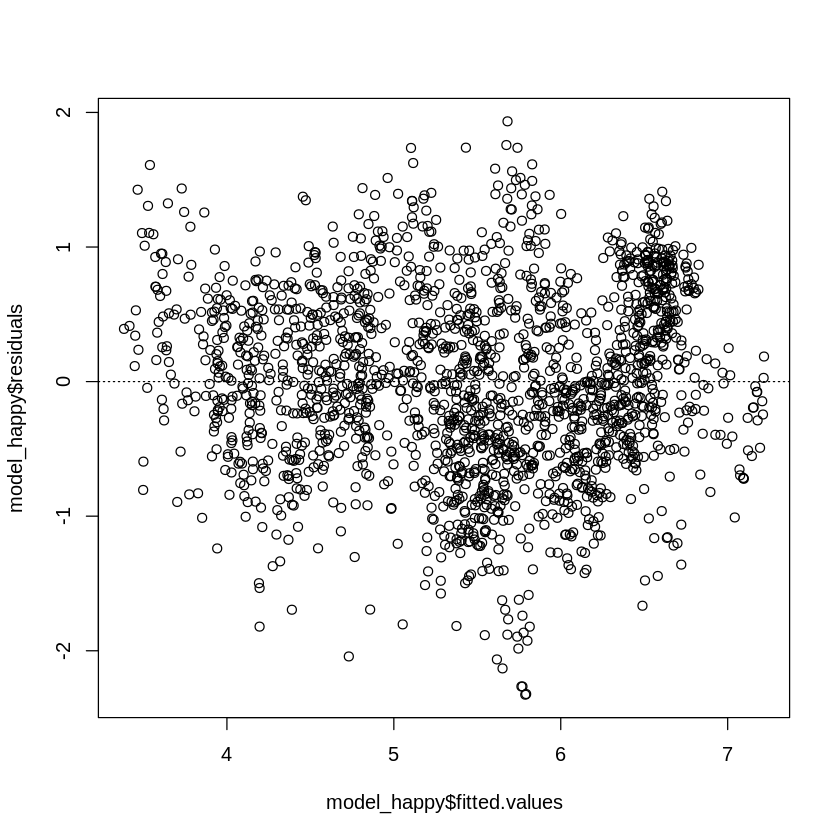

In [ ]:
plot(y = model_happy$residuals, x = model_happy$fitted.values)
abline(h = 0, lty = 3)

The plot above is just the line fit to the scatterplot we saw before. Intuatively you can check to see if the straight line fits the data, or if a curvy line might fit better.

There are two things to keep in mind when checking the assumptions of the linear regression.

> The first is that the assumptions do not need to be perfect to give you a resonable estimate.

> The second is that often the way the model fails can help you build a better model.

### 6. Interpret the results

From the results above what can you answer the question you posed in section 1?  
> What is the association between the two variables that you tested?

> What does the confidence interval tell you about how certain you are in the sign and magnitude of that association?

> How "good" are your model predictions?

> Think about internal validity of our results: can we say what causes what?

> Think about the external validity of our results: can we generalize from our sample to real differences between countries?
  
> Feel free to post some of these answers to Slack as you go!
  
If you've finished this section, try going back up and asking another question!